# Импорты

In [73]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Более крутая линейная регрессия
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Подготовка датасета

In [2]:
boston = load_boston()

/home/victor/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

## Содержимое датасета
**DESCR** - описание
**data** - наши фичи
**feature_names** - имена фичей
**target** - цена, которую мы будем предсказывать

 ## Имена фичей
**CRIM** - уровень преступности на душу населения по городам.
**ZN** - доля земель под жилую застройку, зонированных под участки свыше 25 000 кв.м.
**INDUS** - доля акров неторгового бизнеса на город.
**CHAS** - фиктивная переменная реки Чарльз (1, если участок граничит с рекой; 0 в противном случае)
**NOX** - концентрация оксидов азота (частей на 10 млн).
**RM** - среднее количество комнат в жилом помещении.
**AGE** - доля жилых единиц, построенных до 1940г.
**DIS** - взвешенные расстояния до пяти центров занятости Бостона.
**RAD** - индекс доступности к радиальным магистралям.
**TAX** - полная ставка налога на имущество за 10 000 долларов США.
**PTTRATIO** - соотношение учеников и учителей по городам.
**B** - 1000 (Bk - 0,63)^2, где Bk - доля чернокожих по городам.
**LSTAT** - % более низкий статус населения.
**MEDV** - Средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

##  Смотрим что в каждом столбце датасета

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Исследуем данные используя Pandas датафреймы
Датафреймы в Pandas это как таблицы в экселе, но на стеройдах

Создаём датафрейм, где колонки это название фичей(boston.feature_names), а их содержимое это данные(boston.data) из датасета. Ещё надо сделать колонку PRICE, её содержимое это boston.target

In [7]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

In [8]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
pd.isnull(df).any() # Проверяем наличие пропусков в данных

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

Тип всех параметров - float64(числовой). С праметрами можно свободно работать.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Визуализация

In [11]:
plt.figure(figsize=(10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

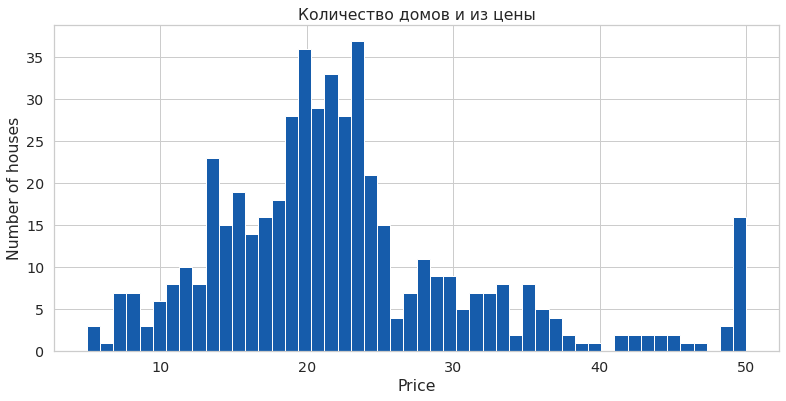

In [65]:
plt.figure(figsize=(13, 6))
plt.hist(df['PRICE'], color='#165CAB', bins=50)
sns.set(font_scale=1.3)

sns.set_style("whitegrid")
plt.title('Количество домов и из цены')
plt.ylabel('Number of houses')
plt.xlabel('Price')
plt.show()

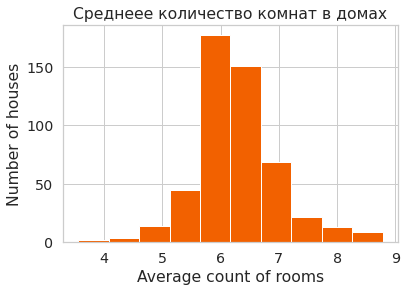

In [32]:
plt.hist(df['RM'], color='#F26100')
plt.title('Среднеее количество комнат в домах')
plt.xlabel('Average count of rooms')
plt.ylabel('Number of houses')
plt.show()

На графике доступности метро есть ассиметрия и огромный выброс. Дальше из-за этого будут небольшие трудности

<BarContainer object of 9 artists>

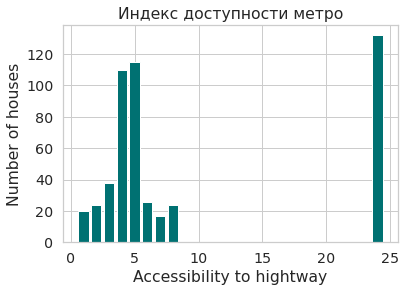

In [63]:
free = df['RAD'].value_counts()
plt.title('Индекс доступности метро')
plt.xlabel('Accessibility to hightway')
plt.ylabel('Number of houses')
plt.bar(free.index, height=free, color='#007172')

### Основные статисческие сведения о данных

In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Кореляции
**Кореляция** - степень с которой два признака изменяются

 1. Кореляция между стоимостью домов и кол-вом комнат. **Больше комнат, больше стоимость**
 2. Кореляция между стоимостью и соотношением учеников/учителей. Чем меньше учеников на одного учителя, тем вероятно обеспеченей район в котором находится дом. **Чем больше учеников на учителя, тем ниже цена, кореляция отрицательная**

In [75]:
df['PRICE'].corr(df['RM'])

0.6953599470715393

In [76]:
df['PRICE'].corr(df['PTRATIO'])

-0.5077866855375621

## Матрица кореляций
Важно чтобы была хороша кореляwия между ценой и параметром, но плохо если есть кореляция между параметром и параметром. Если два параметра связаны, то это называется **мультиколлинеарность**, позже поймёте почему это плохо.

Можно сказать что DIS, AGE и INDUS мультиколлинеарны

In [18]:
mask = np.zeros_like(df.corr())
triangle = np.triu_indices_from(mask)
mask[triangle] = True

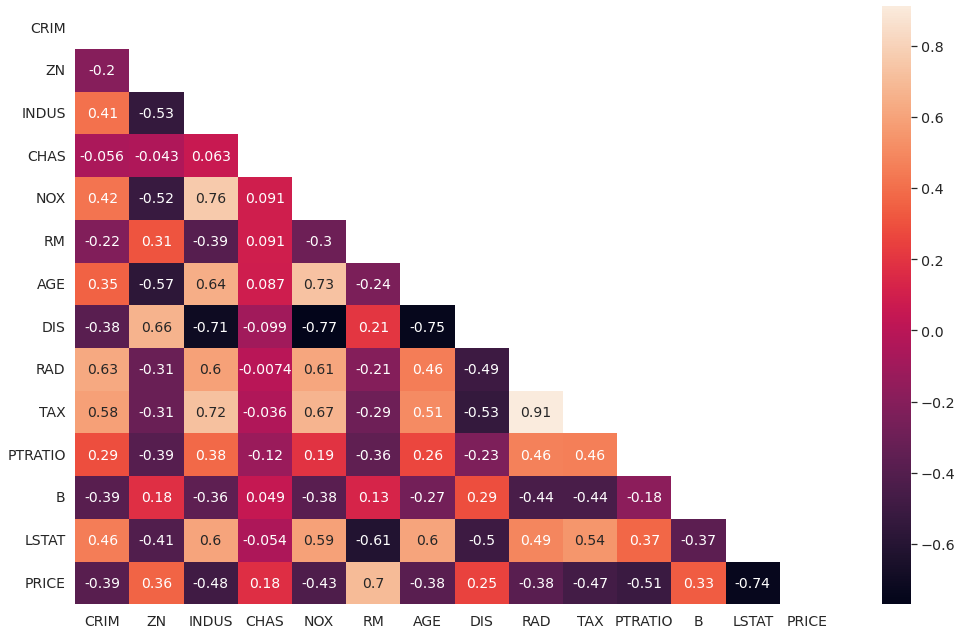

In [77]:
plt.figure(figsize=(17, 11))
sns.set_style('white')

sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={'size': 14}) # без mask=mask карта будет не треугольная, а прямоугольная. Данные просто будут дублироваться и мешать вопринимать их
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.show()

Text(0.5, 25.80000000000002, 'Среднее кол-во комнат в доме')

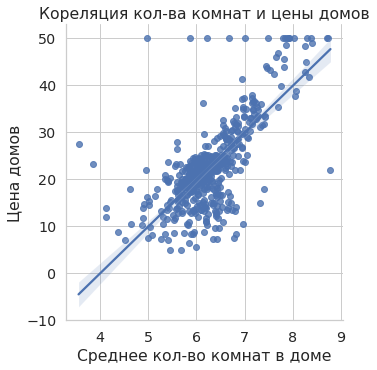

In [80]:
sns.set_style('whitegrid')
sns.lmplot(data=df, x='RM', y='PRICE', robust=True)
plt.title('Кореляция кол-ва комнат и цены домов')
plt.ylabel('Цена домов')
plt.xlabel('Среднее кол-во комнат в доме')

# Обучение модели
Разделим данные на те, на которых будем обучаться и тестовые. 80% - тренировочные данные, 20% - тестовые данные.

Модель, которую тестируют на тех же данных, на которых обучали, это как школьник который заучил ответы, но почему они такие не понимает

In [21]:
prices = df['PRICE']
features = df.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

## Тренировка
Свободный коэффициент(Intercept). То, чему равна зависимая переменная, если переменная, которую мы исследуем равна нулю.

In [22]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Успешность обучения модели на тренировочных данных:', regr.score(X_train, y_train))
print('Успешность обучения на тестовых данных:', regr.score(X_test, y_test))
print('Intercept:', regr.intercept_)

pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Успешность обучения модели на тренировочных данных: 0.750121534530608
Успешность обучения на тестовых данных: 0.6709339839115642
Intercept: 36.53305138282472


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


# Работаем с ценами
Если вы внимательно смотрели на график то помните выбросы в правое части, надо что-то с этим сделать

In [23]:
round(df["PRICE"].skew()) # перекос от нормального распределения

1

In [24]:
df["PRICE"].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64>

In [25]:
y_log = round(np.log(df["PRICE"]), 4)
y_log.tail()

501    3.1091
502    3.0253
503    3.1739
504    3.0910
505    2.4765
Name: PRICE, dtype: float64

По скольку мы перевели в логоорифмы наши цены, распределенрие стало больше походить на нормальное

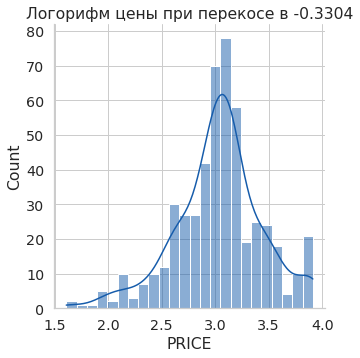

In [53]:
sns.displot(y_log, kde=True, color='#165CAB')
plt.title(f'Логорифм цены при перекосе в {round(y_log.skew(), 4)}')
plt.show()

Обучим нашу модель ещё раз, но переведём цены в логорифмы

In [27]:
prices = np.log(df['PRICE']) # вот тут мы перевели цены в логорифмы
features = df.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Успешность обучения модели на тренировочных данных:', regr.score(X_train, y_train))
print('Успешность обучения на тестовых данных:', regr.score(X_test, y_test))
print('Intercept:', regr.intercept_)

pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Успешность обучения модели на тренировочных данных: 0.7930234826697583
Успешность обучения на тестовых данных: 0.7446922306260737
Intercept: 4.059943871775207


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


# Убираем лишнее
У нас на руках коэффициенты. Чтобы решить, убирать параметр или нет мы будем смотреть на p-уровень и VIF(мультиколинеарность).

**P-уровень** - значение стастической важности, так сложилось, что если p < 0.05(5%), то признак не так важен

##  Какие параметры важны?
Здесь нам пригодится более продвинутая библиотека для стастики, я импортировал её в начале ноутбука.

Чем больше коэффициент, тем ниже p-уровень. Посмотрите на значения INDUS, AGE, надо это запомнить, это может где-то нам помочь

### P-уровень

In [28]:
X_const = sm.add_constant(X_train) # Константа для X_train

# Обучаем более продвинутую регрессию
model = sm.OLS(y_train, X_const)
res = model.fit()

pd.DataFrame({'coef': res.params, 'p-value': round(res.pvalues, 3)})

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


### Мультиколлинеарность
Мультиколлинеарность показывает насколько один параметр зависит от других

Для проверки значений на Мультиколлинеарность я использую VIF, его суть проста, мы строим линейную регрессию, но вместо цены, мы подставляем параметр, пытаемся его предсказать. Далее мы считаем коэфициент детерминации для оценки модели.

Если с помощью одного параметра можно предсказать другой, то это плохо, потому что она делает нашу модель менее устойчивой для оценки.

Если короче, то нужно чтобы VIF был максимально маленький. В нашем случае всё хорошо если vif меньше 10


In [29]:
variance_inflation_factor(exog=X_const.values, exog_idx=1)

1.7145250443932485

In [30]:
vif = [variance_inflation_factor(exog=X_const.values, exog_idx=i)
       for i in range(X_const.shape[1])]

pd.DataFrame({'coef_name': X_const.columns,
              'vif': np.around(vif, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


# Упрощаем используя BIC
Чем меньше BIC, тем она проще, значит лучше.

Сейчас мы снова построим модель и посчитаем для неё BIC, но кроме BIC мы посчитаем и коэффициент детерминации, потому что это лучший показатель точности модели.

В первой ячейке мы нечего не выкидвали, во второй мы выкинем переменную INDUS и AGE т.к. у них огромный p-уровень.

In [45]:
X_const = sm.add_constant(X_train) # Константа для X_train

# Обучаем более продвинутую регрессию
model = sm.OLS(y_train, X_const)
res = model.fit()

org_coef = pd.DataFrame({'coef': res.params, 'p-value': round(res.pvalues, 3)})

# Выводим коэфициенты
print('BIC модели:', res.bic)
print('Коэффициент детерминации:', res.rsquared)

BIC модели: -139.74997769478898
Коэффициент детерминации: 0.7930234826697584


BIC упал, а точность практически не поменялась, круто

In [46]:
X_const = sm.add_constant(X_train) # Константа для X_train
X_const = X_const.drop(['INDUS', 'AGE'], axis=1)

# Обучаем более продвинутую регрессию
model = sm.OLS(y_train, X_const)
res = model.fit()

reduced_coef = pd.DataFrame({'coef': res.params, 'p-value': round(res.pvalues, 3)})

# Выводим коэфициенты
print('BIC модели:', res.bic)
print('Коэффициент детерминации:', res.rsquared)

BIC модели: -149.49934294224678
Коэффициент детерминации: 0.7918657661852816


## Сравниваем модели

Слева модель где есть INDUS и AGE, а справа их нету (значения NaN)

Заметьте что они не сильно отличаются по значениям. Если бы они отличаись, этобы значило что между параметрами есть связь, но у нас низкая мультиколлинеарность. Всё хорошо

In [48]:
frames = [org_coef, reduced_coef]
pd.concat(frames, axis=1, join="outer")

,coef,p-value,coef,p-value
const,4.059944,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN
CHAS,0.080331,0.038,0.086449,0.025
NOX,-0.704068,0.000,-0.616448,0.000
RM,0.073404,0.000,0.076133,0.000
AGE,0.000763,0.209,NaN,NaN
DIS,-0.047633,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.013743,0.000


## Остатки

Остаток - разница между значением которое предсказала модель и тем значением которое мы дали ей для обучения. При расчёте остатка не важно на сколько больше/меньше, важен сам факт.


Text(0, 0.5, 'Ошибка для предсказания')

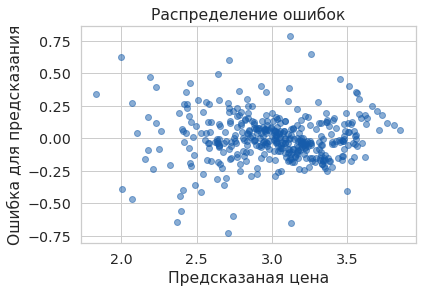

In [56]:
prices = np.log(df['PRICE']) # вот тут мы перевели цены в логорифмы
features = df.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

# Обучаем более продвинутую регрессию
X_const = sm.add_constant(X_train) #Константа для X_train

model = sm.OLS(y_train, X_const)
res = model.fit()

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

plt.scatter(x=res.fittedvalues, y=res.resid, c='#165CAB', alpha=0.5)
plt.title('Распределение ошибок')
plt.xlabel('Предсказаная цена')
plt.ylabel('Ошибка для предсказания')

Строим график ошибок и цен, если закономерностей в ошибках нету, то всё хорошо. В нашем случае распределение достаточно соответствует нормальному, это тоже очень хорошо, значит мы можем использовать свойства нормального распределения.

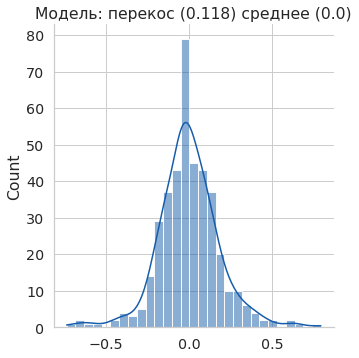

In [62]:
resid_mean = round(res.resid.mean(), 3)
resid_skew = round(res.resid.skew(), 3)

sns.displot(res.resid, color='#165CAB', kde=True)
plt.title(f'Модель: перекос ({resid_skew}) среднее ({abs(resid_mean)})')
plt.show()

# Доверительные интервалы

Построим доверительный интервал с точностью ~95%
По свойству нормального распределения в радиусе двух сигмы(стандартных квадратических отклонения) в лево и в прово, то в этом интервале будут ~98% наблюдений.

По скольку наше распределение не совесем нормальное, то я предположу что точность будет ~95%

In [71]:
# Считаем среднее квадратическое всех ошибок и достаём из него корень, тем самым получаем сигму
reduced_log_mse = round(res.mse_resid, 3)
sigm_to_log = np.sqrt(reduced_log_mse)
print('2 сигмы в логорифмах', 2*sigm_to_log)

# Для верхней границы мы предсказываем 30000(логорифм 30) + два стандартных отклонений
upper_bound = np.log(30) + 2*sigm_to_log
print('Верхний предел: ', round(np.e ** upper_bound * 1000, 2))

# Для нижней границы мы предсказываем 30000(логорифм 30) - два стандартных отклонений
lower_bound = np.log(30) - 2*sigm_to_log
print('Нижний предел:', round(np.e ** lower_bound * 1000, 2))

2 сигмы в логорифмах 0.37416573867739417
Верхний предел:  43613.34
Нижний предел: 20635.89


In [72]:
30000 + np.e ** sigm_to_log * 1000

31205.727198725584

# Итог

Пройдя путь от самой простой линейной регресии, заканчивая логорифмами, сигмами и ошибками среднего мы расчитали доверительный интервал с точностью ~95%. Можно сказать что хороший дом в Бостоне можно купить между 20635.8 и 43613.34 долларами. В 1978 году, сейчас даже не мечтайте, кризис, инфляция, военные конфликты.

Сам я новичёк и далеко не до конца понимаю все особенности машинного обучения, но желанию разобраться в этом это не мешает.